11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.3364 - val_loss: 0.1626
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.1534 - val_loss: 0.1330
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.1313 - val_loss: 0.1229
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1227 - val_loss: 0.1174
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1173 - val_loss: 0.1130
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1131 - val_loss: 0.1095
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1102 - val_loss: 0.1073
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1073 - val_loss: 0.1044
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.1053 - val_loss: 0.1021
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1030 - val_loss: 0.1005
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1014 - val_los

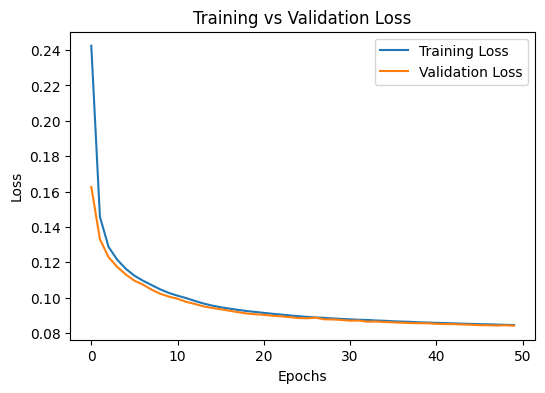

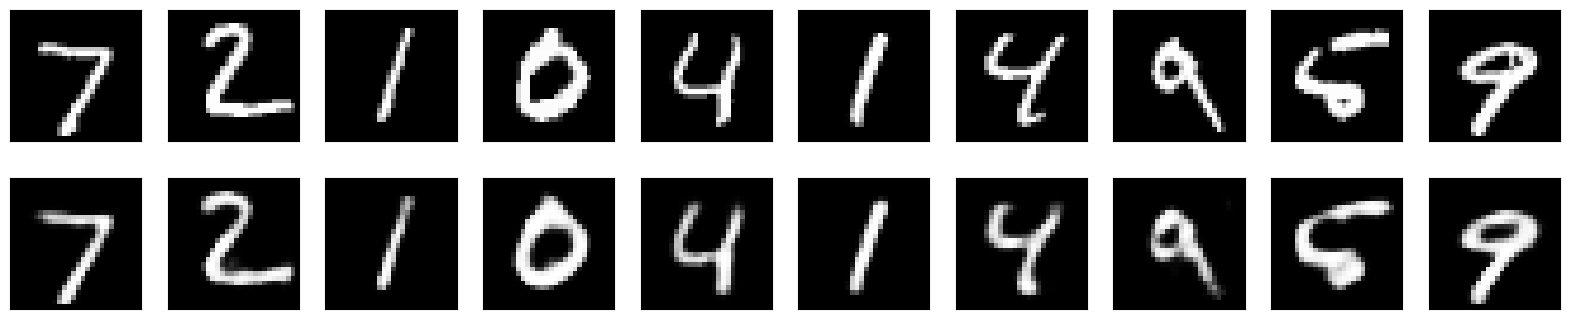

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test),
                          verbose=1)

decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
